<a href="https://colab.research.google.com/github/alexanderatkins/kaggle/blob/master/house-prices-advanced-regression-techniques/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
test_prices_csv_url = "https://raw.githubusercontent.com/alexanderatkins/kaggle/master/house-prices-advanced-regression-techniques/sample_submission.csv"
test_prices_csv = pd.read_csv(test_prices_csv_url)
test_prices_csv.head

<bound method NDFrame.head of         Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]>

In [16]:
train_csv_url = "https://raw.githubusercontent.com/alexanderatkins/kaggle/master/house-prices-advanced-regression-techniques/train.csv"
test_csv_url = "https://raw.githubusercontent.com/alexanderatkins/kaggle/master/house-prices-advanced-regression-techniques/test.csv"
test_csv = pd.read_csv(test_prices_csv_url)
train_csv = pd.read_csv(train_csv_url)
train_csv.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
training_prices = train_csv[["Id", 'SalePrice']]
training_data = train_csv.drop(columns=["SalePrice"])
training_prices.head


<bound method NDFrame.head of         Id  SalePrice
0        1     208500
1        2     181500
2        3     223500
3        4     140000
4        5     250000
...    ...        ...
1455  1456     175000
1456  1457     210000
1457  1458     266500
1458  1459     142125
1459  1460     147500

[1460 rows x 2 columns]>

### NA Values in dataset

Next we check for NA values and see which columns they are associated with
and what fraction of the data points. According to the data description, for some columns N/A is significant. For these we will create a new value to replace N/A with a label that plays nice and implies significance.

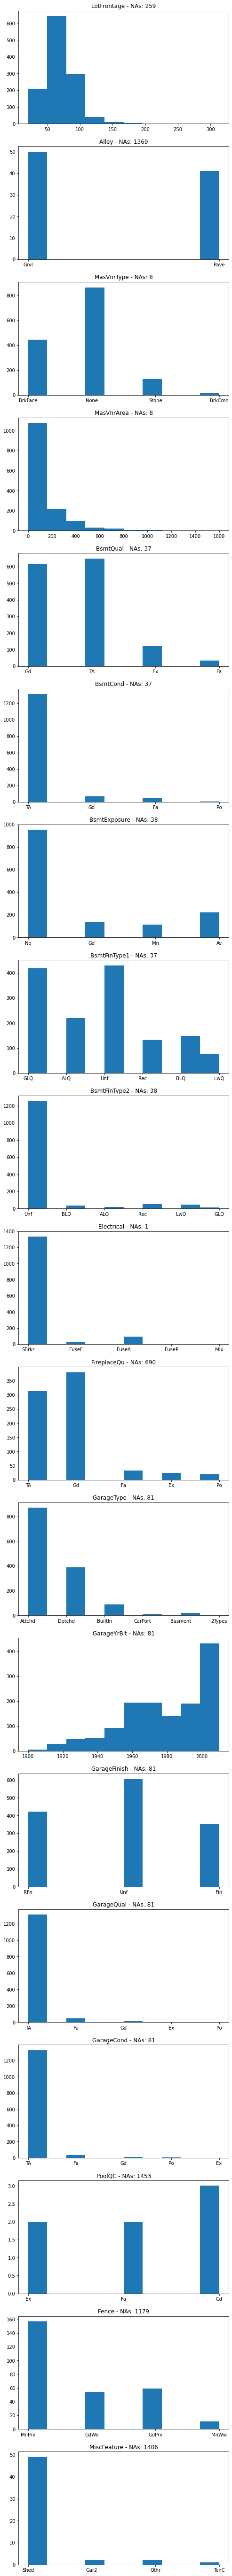

In [23]:
na_cols = training_data.columns[training_data.isnull().sum() != 0]
print(len(na_cols))
fig = plt.figure(figsize=(8,100))
for i in range(0, len(na_cols)):
    ax = fig.add_subplot(len(na_cols), 1, i+1)
    col = na_cols[i]
    ax.hist(training_data[col][training_data[col].isna() == 0])
    ax.set_title(col + " - NAs: " + str(training_data[col].isna().sum()))
fig.show()

In [30]:
print(training_data['Alley'].isna().sum())
training_data.loc[(training_data['Alley'].isna() == 1), 'Alley'] = "No Alley"
training_data.loc[(training_data['MasVnrType'].isna() == 1), 'MasVnrType'] = "No Masonry Type"
training_data.loc[(training_data['BsmtQual'].isna() == 1), 'BsmtQual'] = "No_BsmtQual"
training_data.loc[(training_data['BsmtCond'].isna() == 1), 'BsmtCond'] = "No_BsmtCond"
training_data.loc[(training_data['PoolQC'].isna() == 1), 'PoolQC'] = "No_PoolQC"
training_data.loc[(training_data['Fence'].isna() == 1), 'Fence'] = "No_Fence"
training_data.loc[(training_data['MiscFeature'].isna() == 1), 'MiscFeature'] = "No Misc Feature"
training_data.loc[(training_data['GarageCond'].isna() == 1), 'GarageCond'] = "No Garage"
training_data.loc[(training_data['GarageQual'].isna() == 1), 'GarageQual'] = "No Garage"
training_data.loc[(training_data['FireplaceQu'].isna() == 1), 'FireplaceQu'] = "No Fireplace"


print(training_data['Alley'].isna().sum())
print(training_data.columns[training_data.isnull().sum() != 0].shape)

0
0
(10,)
